In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("employee_promotion.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [3]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [4]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [5]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000661,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.044430,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.049500,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075474,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.039381,-0.010670
awards_won,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.073963,0.195871
avg_training_score,-0.000661,0.044430,-0.049500,0.075474,-0.039381,0.073963,1.000000,0.184386
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.184386,1.000000


In [6]:
df["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [7]:
df["education"]=df["education"].map({"Bachelor's":0,"Master's & above":1,"Below Secondary":2})

In [8]:
df["education"].value_counts()

0.0    36669
1.0    14925
2.0      805
Name: education, dtype: int64

In [9]:
df["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [10]:
df["avg_training_score"].value_counts()

50.0    2716
49.0    2681
48.0    2437
51.0    2347
60.0    2155
59.0    2064
58.0    1898
52.0    1856
47.0    1746
62.0    1450
82.0    1447
57.0    1437
81.0    1357
53.0    1324
80.0    1206
83.0    1198
84.0    1168
79.0    1160
46.0    1136
85.0    1072
56.0    1070
70.0    1055
63.0    1021
69.0    1018
54.0     997
68.0     935
78.0     933
86.0     912
71.0     898
55.0     872
67.0     728
72.0     725
64.0     708
77.0     697
87.0     655
65.0     599
66.0     580
73.0     523
76.0     516
88.0     444
74.0     433
75.0     403
44.0     335
89.0     301
90.0     185
43.0     176
91.0     117
92.0      99
93.0      84
94.0      65
42.0      62
97.0      49
96.0      48
95.0      45
98.0      37
99.0      35
41.0      26
40.0       5
39.0       2
Name: avg_training_score, dtype: int64

In [11]:
df["education"].fillna(0,inplace=True)

In [12]:
df["previous_year_rating"].fillna(df["previous_year_rating"].mean(),inplace=True)

In [13]:
df["avg_training_score"].fillna(df["avg_training_score"].mean(),inplace=True)

In [14]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
for i in df.columns:
    print(df[i].value_counts())

4098     1
60919    1
36347    1
48637    1
44543    1
        ..
15122    1
789      1
6934     1
4887     1
2047     1
Name: employee_id, Length: 54808, dtype: int64
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_

In [16]:
df1=df.copy()
df1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,1.0,f,sourcing,1,35,5.0,8,0,49.000000,0
1,65141,Operations,region_22,0.0,m,other,1,30,5.0,4,0,60.000000,0
2,7513,Sales & Marketing,region_19,0.0,m,sourcing,1,34,3.0,7,0,50.000000,0
3,2542,Sales & Marketing,region_23,0.0,m,other,2,39,1.0,10,0,50.000000,0
4,48945,Technology,region_26,0.0,m,other,1,45,3.0,2,0,73.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,0.0,m,sourcing,1,48,3.0,17,0,78.000000,0
54804,74592,Operations,region_27,1.0,f,other,1,37,2.0,6,0,56.000000,0
54805,13918,Analytics,region_1,0.0,m,other,1,27,5.0,3,0,79.000000,0
54806,13614,Sales & Marketing,region_9,0.0,m,sourcing,1,29,1.0,2,0,63.712238,0


In [17]:
a=df1[df1["is_promoted"]==0]
b=df1[df1["is_promoted"]==1]
s=a.sample(n=4668)
df=pd.concat([s,b],axis=0)
df["is_promoted"].value_counts()

0    4668
1    4668
Name: is_promoted, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df.shape

(9336, 13)

In [20]:
columns=["employee_id","region","gender","recruitment_channel"]
df.drop(columns,axis=1,inplace=True)
df

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
14883,Procurement,0.0,3,30,5.000000,9,0,67.0,0
38013,Procurement,1.0,1,44,3.000000,19,0,63.0,0
43232,Analytics,0.0,1,35,3.000000,8,0,86.0,0
43536,Technology,0.0,1,25,3.000000,3,1,79.0,0
16587,Sales & Marketing,0.0,1,31,1.000000,5,0,52.0,0
...,...,...,...,...,...,...,...,...,...
54734,Operations,0.0,1,31,3.329256,1,0,56.0,1
54757,Technology,1.0,1,54,4.000000,7,0,81.0,1
54761,Procurement,0.0,1,30,4.000000,2,0,86.0,1
54792,Sales & Marketing,0.0,1,59,3.000000,11,0,65.0,1


array([[<AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'awards_won'}>],
       [<AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>, <AxesSubplot:>]],
      dtype=object)

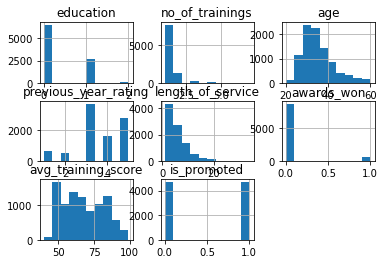

In [21]:
df.hist()

In [22]:
df.corr()

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
education,1.000000,-0.031110,0.276619,0.017038,0.193277,0.007619,0.035387,0.049734
no_of_trainings,-0.031110,1.000000,-0.064824,-0.055365,-0.040430,-0.021863,0.035628,-0.050143
age,0.276619,-0.064824,1.000000,0.026892,0.650878,-0.000415,-0.054668,-0.032334
previous_year_rating,0.017038,-0.055365,0.026892,1.000000,0.018443,0.063531,0.116645,0.297203
length_of_service,0.193277,-0.040430,0.650878,0.018443,1.000000,-0.059522,-0.032782,-0.017720
awards_won,0.007619,-0.021863,-0.000415,0.063531,-0.059522,1.000000,0.176851,0.213637
avg_training_score,0.035387,0.035628,-0.054668,0.116645,-0.032782,0.176851,1.000000,0.289921
is_promoted,0.049734,-0.050143,-0.032334,0.297203,-0.017720,0.213637,0.289921,1.000000


In [23]:
from sklearn.model_selection import train_test_split
cols=["avg_training_score","awards_won","previous_year_rating"]
X=df[cols]
Y=df["is_promoted"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
Y.value_counts()

0    4668
1    4668
Name: is_promoted, dtype: int64

### Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [25]:
k=pd.DataFrame(Y_pred)
k.value_counts()

0    1483
1    1318
dtype: int64

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred))

Accuracy :  0.6601213852195644
Confusion Matrix : 
 [[966 435]
 [517 883]]


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
d=pd.DataFrame(Y_pred)
d.value_counts()

0    1678
1    1123
dtype: int64

In [28]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred))

Accuracy :  0.6497679400214209
Confusion Matrix : 
 [[1049  352]
 [ 629  771]]


### Naive Bayes Classifier 

In [29]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
n=pd.DataFrame(Y_pred)
n.value_counts()

0    2262
1     539
dtype: int64

In [30]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred))

Accuracy :  0.6297750803284541
Confusion Matrix : 
 [[1313   88]
 [ 949  451]]


### Support Vector Machine 

In [31]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
s=pd.DataFrame(Y_pred)
s.value_counts()

0    1576
1    1225
dtype: int64

In [32]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred))

Accuracy :  0.6419136022848982
Confusion Matrix : 
 [[987 414]
 [589 811]]


### Multilayer Perceptron 

In [33]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(3,3),random_state=1,learning_rate_init=0.01)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
m=pd.DataFrame(Y_pred)
m.value_counts()

1    1452
0    1349
dtype: int64

In [34]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred))

Accuracy :  0.6572652624062835
Confusion Matrix : 
 [[895 506]
 [454 946]]


## Boosting 

### Adaboost classifier 

In [38]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
b=pd.DataFrame(Y_pred)
b.value_counts()

0    1481
1    1320
dtype: int64

In [39]:
print("Accuracy : ",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred))

Accuracy :  0.6658336308461263
Confusion Matrix : 
 [[973 428]
 [508 892]]


In [41]:
lr=LogisticRegression()
adb_model1=AdaBoostClassifier(n_estimators=100,base_estimator=lr,learning_rate=0.01)
adb_model1.fit(X_train,Y_train)
lr_pred=adb_model1.predict(X_test)
lb=pd.DataFrame(lr_pred)
lb.value_counts()

0    1481
1    1320
dtype: int64

In [42]:
print("Accuracy : ",accuracy_score(Y_test,lr_pred))
print("Confusion Matrix : \n",confusion_matrix(Y_test,lr_pred))

Accuracy :  0.6387004641199572
Confusion Matrix : 
 [[935 466]
 [546 854]]


In [ ]:
dtc=DecisionTreeClassifier()
adb_model2=AdaBoostClassifier(n_estimators=100,base_estimator=dtc,learning_rate=0.01)
adb_model2.fit(X_train,Y_train)
dtc_pred=adb_model2.predict(X_test)
pd.DataFrame(dtc_pred)